In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Raw Data Processing

Computing duration from date of creation, to date of last push. Some repos are forks of others, so if they  inherit the commit history, it might look like the date of last update predates the creation itself.

In [4]:
#input_file = "../../rs_usage/metadata/metadata.csv"
#metadata = pd.read_csv(input_file)
#metadata.set_index('Unnamed: 0', inplace=True)
#metadata['created_at'] = pd.to_datetime(metadata['created_at'], format='%Y-%m-%dT%H:%M:%SZ')
#metadata['pushed_at'] = pd.to_datetime(metadata['pushed_at'], format='%Y-%m-%dT%H:%M:%SZ')
#lifespan = metadata['pushed_at'] - metadata['created_at']
#lifespan_months = lifespan.dt.days / 30.436875
#with open('../data/lifespan_months.npy', 'wb') as f:
#    np.save(f, lifespan_months.values)

In [5]:
lifespan_months = np.load('../data/lifespan_months.npy')

Text(0.5, 1.0, "Histogram of Repositories' Inactivity Times")

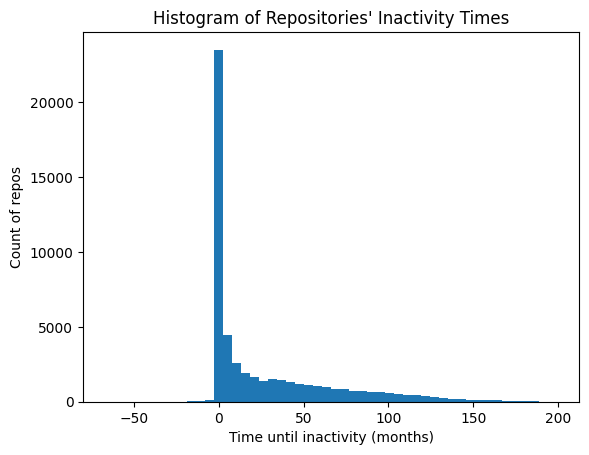

In [33]:
fig, ax = plt.subplots()
ax.hist(lifespan_months, bins=50)
ax.set_xlabel("Time until inactivity (months)")
ax.set_ylabel("Count of repos")
ax.set_title("Histogram of Repositories' Inactivity Times")

## ECDF: Empirical Cumulative Distribution Function
Here representing the Empirical Cumulative Distribution Function. Illustrating the "dropout" at each timepoint

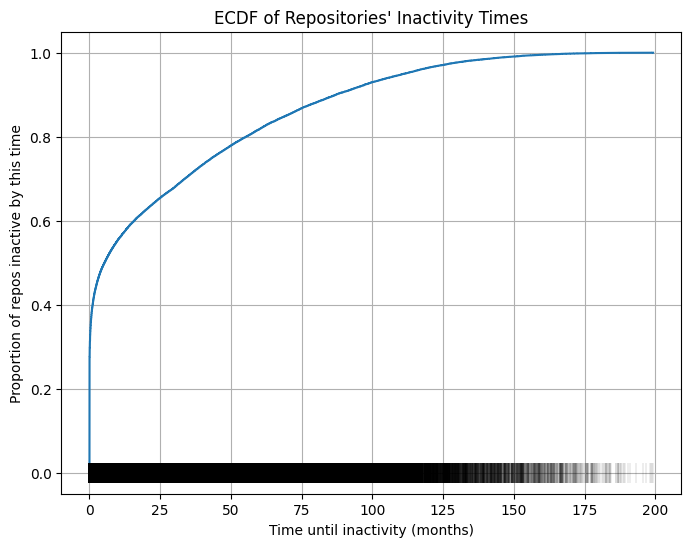

In [34]:
fig, ax = plt.subplots(figsize=(8,6))
lifespan_positive = lifespan_months[lifespan_months>=0]
times = np.sort(lifespan_positive)
n = len(times)
y = np.arange(1, n+1) / n

ax.step(times, y)
ax.set_xlabel("Time until inactivity (months)")
ax.set_ylabel("Proportion of repos inactive by this time")
ax.set_title("ECDF of Repositories' Inactivity Times")
ax.plot(lifespan_positive, np.zeros_like(lifespan_positive), '|', color='black', markeredgewidth=0.1, markersize=15, alpha=1, label='Data points')
ax.grid(True)